In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Brazilsimpledata.csv')
df.head()

,Year,Percentage of land,Area,Area combined
0,1990,70.458021,730,1680
1,1991,70.005654,30,1730
2,1992,69.553288,786,1861
3,1993,69.100922,896,1099
4,1994,68.648556,896,1099


In [3]:
df = df.rename(columns={"Percentage of land": "Percentage"})
df.head()

,Year,Percentage,Area,Area combined
0,1990,70.458021,730,1680
1,1991,70.005654,30,1730
2,1992,69.553288,786,1861
3,1993,69.100922,896,1099
4,1994,68.648556,896,1099


In [4]:
X = df.Percentage.values.reshape(-1, 1)
y = df.Year.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (31, 1) (31, 1)


array([[70.45802056],
       [70.00565437],
       [69.55328817],
       [69.10092198],
       [68.64855578],
       [68.19618958],
       [67.74382339],
       [67.29145719],
       [66.83909099],
       [66.3867248 ],
       [65.9343586 ],
       [65.4616709 ],
       [64.98898319],
       [64.51629549],
       [64.04360779],
       [63.57092009],
       [63.09823238],
       [62.62554468],
       [62.15285698],
       [61.68016927],
       [61.20748157],
       [61.02332816],
       [60.83917474],
       [60.65502133],
       [60.47086792],
       [60.28671451],
       [60.07103255],
       [59.83288148],
       [59.70842795],
       [        nan],
       [        nan]])

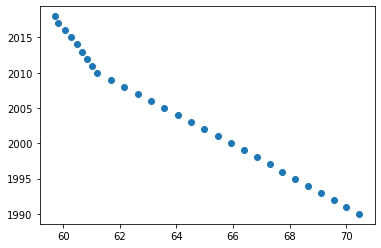

In [5]:
plt.scatter(X, y)

In [6]:
df = df.dropna()
df.head()

,Year,Percentage,Area,Area combined
0,1990,70.458021,730,1680
1,1991,70.005654,30,1730
2,1992,69.553288,786,1861
3,1993,69.100922,896,1099
4,1994,68.648556,896,1099


In [7]:
df = df.round({'Percentage': 1})
df.head()

,Year,Percentage,Area,Area combined
0,1990,70.5,730,1680
1,1991,70.0,30,1730
2,1992,69.6,786,1861
3,1993,69.1,896,1099
4,1994,68.6,896,1099


In [8]:
df = df.reset_index()
df.head()

,index,Year,Percentage,Area,Area combined
0,0,1990,70.5,730,1680
1,1,1991,70.0,30,1730
2,2,1992,69.6,786,1861
3,3,1993,69.1,896,1099
4,4,1994,68.6,896,1099


In [13]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    #"df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


In [17]:
df.dtypes


index              int64
Year               int64
Percentage       float64
Area               int64
Area combined      int64
dtype: object

In [22]:
df['Percentage'] = df['Percentage'].astype(int)
df.head()

,index,Year,Percentage,Area,Area combined
0,0,1990,70,730,1680
1,1,1991,70,30,1730
2,2,1992,69,786,1861
3,3,1993,69,896,1099
4,4,1994,68,896,1099


In [23]:
df.dtypes

index            int64
Year             int64
Percentage       int32
Area             int64
Area combined    int64
dtype: object

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [25]:
model.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

In [ ]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

In [ ]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [ ]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')